In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [164]:
df = pd.read_csv("/Users/intanfarhi/Documents/Purwadhika/CapstoneProject3/SupermarketCustomers.csv", sep='\t')

In [165]:
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [6]:
# Cek Nilai kosong
missing_value = df.isnull().sum()
print(missing_value)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [7]:
# Menghapus income yang kosong
df = df.dropna(subset=['Income'])

In [8]:
print(df['Income'].describe())

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64


In [9]:
# Cek duplikasi
duplicates = df.duplicated().sum()
print(f'Duplicate: {duplicates}')

Duplicate: 0


<Axes: ylabel='Income'>

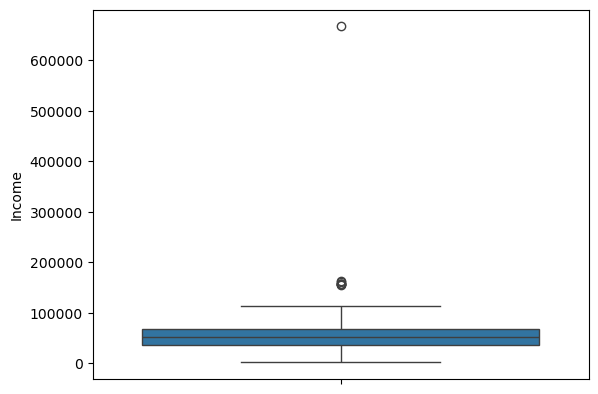

In [10]:
# Cek boxplot untuk cek outlier
sns.boxplot(df['Income'])

In [11]:
# Hapus outlier
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]


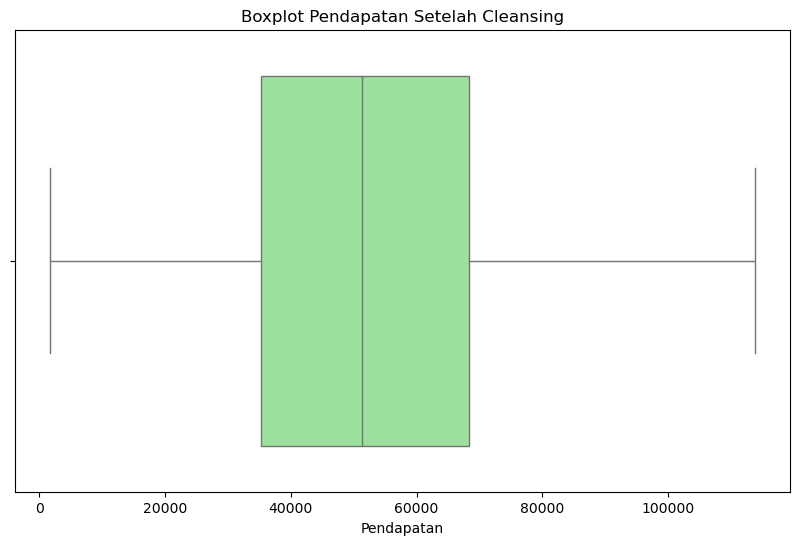

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['Income'], color='lightgreen')
plt.title('Boxplot Pendapatan Setelah Cleansing')
plt.xlabel('Pendapatan')
plt.show()

In [14]:
print("\nStatistik untuk Pendapatan:")
print(df_cleaned['Income'].describe())


Statistik untuk Pendapatan:
count      2208.000000
mean      51633.638134
std       20713.376530
min        1730.000000
25%       35196.000000
50%       51301.000000
75%       68289.750000
max      113734.000000
Name: Income, dtype: float64


In [37]:
# Rename MntWines and MntMeatProducts
df_cleaned.rename(columns={
    'MntWines': 'Pengeluaran untuk Wine',
    'MntMeatProducts': 'Pengeluaran untuk Produk Daging',
    'MntFruits': 'Pengeluaran untuk Buah',
    'MntFishProducts': 'Pengeluaran untuk Produk Ikan'
}, inplace=True)


In [40]:
# Membagi pelanggan menjadi 3 kategori pendapatan
# Low, Medium, dan High
bins = [0, 35000, 70000, 120000]
labels = ['Rendah', 'Sedang', 'Tinggi']
df_cleaned['Golongan Pendapatan'] = pd.cut(df_cleaned['Income'], bins=bins, labels=labels)

# Rata-rata pengeluaran untuk produk wine dan daging pada kategori pendapatan
SpendByIncome = df_cleaned.groupby('Golongan Pendapatan')[[
    'Pengeluaran untuk Wine', 
    'Pengeluaran untuk produk daging',
    'Pengeluaran untuk Buah',
    'Pengeluaran untuk Produk Ikan']].mean()
print("\nRata-rata Pengeluaran Berdasarkan Golongan Pendapatan:")
print(SpendByIncome)



Rata-rata Pengeluaran Berdasarkan Golongan Pendapatan:
                     Pengeluaran untuk Wine  Pengeluaran untuk produk daging  \
Golongan Pendapatan                                                            
Rendah                            21.324226                        22.289617   
Sedang                           292.233822                       114.053494   
Tinggi                           650.930000                       441.326000   

                     Pengeluaran untuk Buah  Pengeluaran untuk Produk Ikan  
Golongan Pendapatan                                                         
Rendah                             5.941712                       8.577413  
Sedang                            20.446937                      28.702330  
Tinggi                            62.818000                      90.792000  


/var/folders/mw/z3kzz6w94jlg5x6x44_4d6qm0000gn/T/ipykernel_9011/3373505061.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  SpendByIncome = df_cleaned.groupby('Golongan Pendapatan')[[


Text(0.5, 0, 'Golongan Pendapatan')

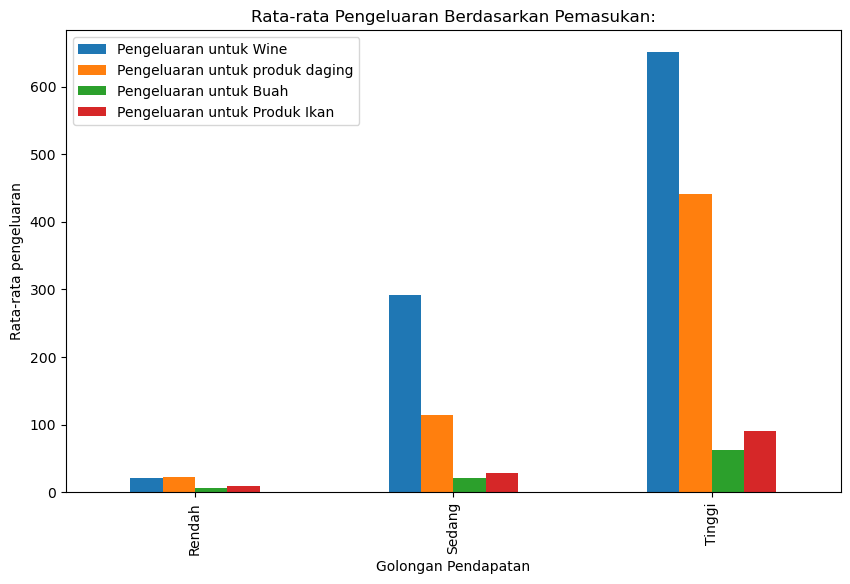

In [145]:

SpendByIncome.plot(kind='bar', figsize=(10, 6))  
plt.title('Rata-rata Pengeluaran Berdasarkan Pemasukan:') 
plt.ylabel('Rata-rata pengeluaran') 
plt.xlabel('Golongan Pendapatan')

In [143]:
agg_data = df.groupby("Golongan Pendapatan")[[
    "Pengeluaran untuk Wine", 
    "Pengeluaran untuk Daging", 
    "Pengeluaran untuk Buah", 
    "Pengeluaran untuk Produk Ikan"
]].mean().reset_index()

print(agg_data)


  Golongan Pendapatan  Pengeluaran untuk Wine  Pengeluaran untuk Daging  \
0              Rendah                    50.0                      40.0   
1              Sedang                   200.0                     150.0   
2              Tinggi                   650.0                     500.0   

   Pengeluaran untuk Buah  Pengeluaran untuk Produk Ikan  
0                    10.0                            5.0  
1                    30.0                           20.0  
2                    80.0                           70.0  


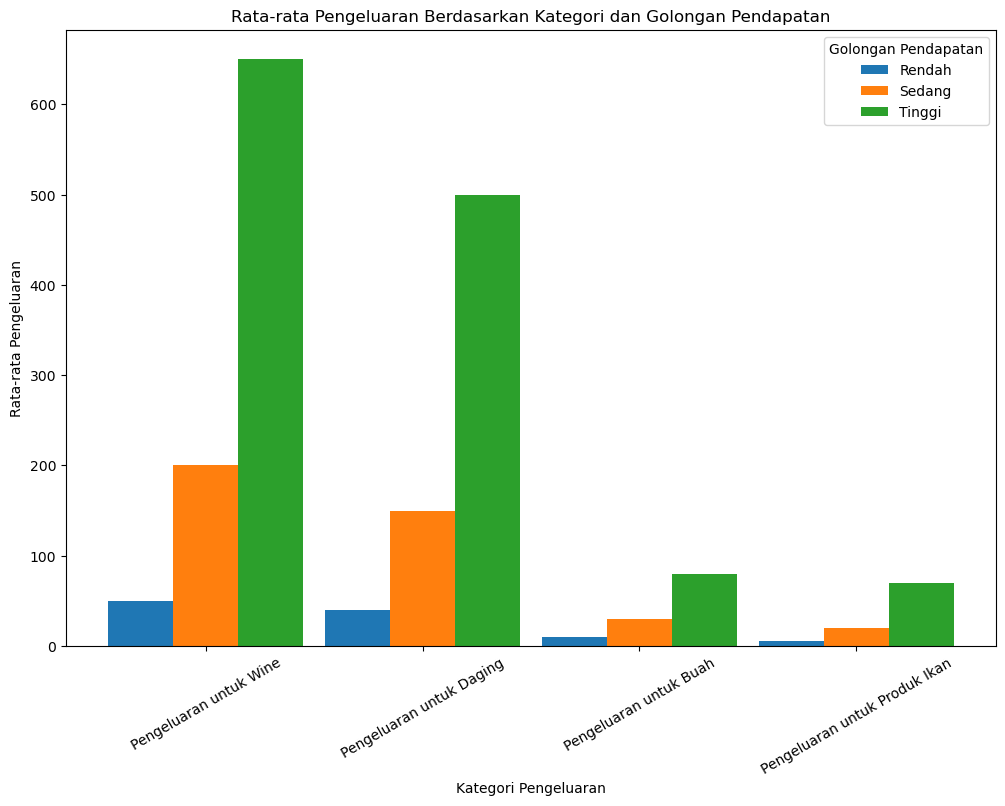

In [163]:
data = agg_data

histogram = pd.DataFrame(agg_data)

# Transpose data to reshape for plotting
categories = ["Pengeluaran untuk Wine", "Pengeluaran untuk Daging", "Pengeluaran untuk Buah", "Pengeluaran untuk Produk Ikan"]
pendapatan = ["Rendah", "Sedang", "Tinggi"]

reshaped_data = df.set_index("Golongan Pendapatan").T
x = np.arange(len(categories))
width = 0.3

# Plotting grouped bar chart
plt.figure(figsize=(12, 8))
for i, pend in enumerate(pendapatan):
    plt.bar(x + i * width, reshaped_data[pend], width, label=pend)

# Adding labels and legend
plt.xticks(x + width, categories, rotation=30)
plt.title("Rata-rata Pengeluaran Berdasarkan Kategori dan Golongan Pendapatan")
plt.ylabel("Rata-rata Pengeluaran")
plt.xlabel("Kategori Pengeluaran")
plt.legend(title="Golongan Pendapatan")
plt.show()

**MEMASUKKAN STATUS PERNIKAHAN**

In [167]:
df = df.dropna(subset=['Marital_Status'])

In [168]:
# Melihat nilai unik dari status pernikahan
print("\nKategori di 'Marital_Status':")
print(df['Marital_Status'].unique())


Kategori di 'Marital_Status':
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [170]:
# Menseleksi status yang tidak jelas
df_cleaned = df_cleaned.dropna(subset=['Marital_Status', 'Kidhome', 'Teenhome'])
marital_map = {
    'Single': 'Single',
    'Alone': 'Single',
    'Together': 'Married',
    'Married': 'Married',
    'Divorced': 'Single Parent',
    'Widow': 'Single Parent',
    'Absurd': 'Other',
    'YOLO': 'Other'}
df_cleaned['CleanedStatus'] = df_cleaned['Marital_Status'].map(marital_map)
df_cleaned = df_cleaned[df_cleaned['CleanedStatus'] != 'Other']

In [171]:

# Rata-rata pengeluaran dari status nikah
SegmenStatusNikah = df_cleaned.groupby('CleanedStatus')[[
    'Pengeluaran untuk Wine', 
    'Pengeluaran untuk produk daging',
    'Pengeluaran untuk Buah',
    'Pengeluaran untuk Produk Ikan']].mean()
print("\nRata-rata Pengeluaran Berdasarkan Status Pernikahan:")
print(SegmenStatusNikah)


Rata-rata Pengeluaran Berdasarkan Status Pernikahan:
               Pengeluaran untuk Wine  Pengeluaran untuk produk daging  \
CleanedStatus                                                            
Married                    304.624034                       160.427266   
Single                     290.656118                       183.845992   
Single Parent              336.368078                       159.387622   

               Pengeluaran untuk Buah  Pengeluaran untuk Produk Ikan  
CleanedStatus                                                         
Married                     25.690794                      37.066058  
Single                      27.113924                      38.575949  
Single Parent               28.612378                      38.833876  


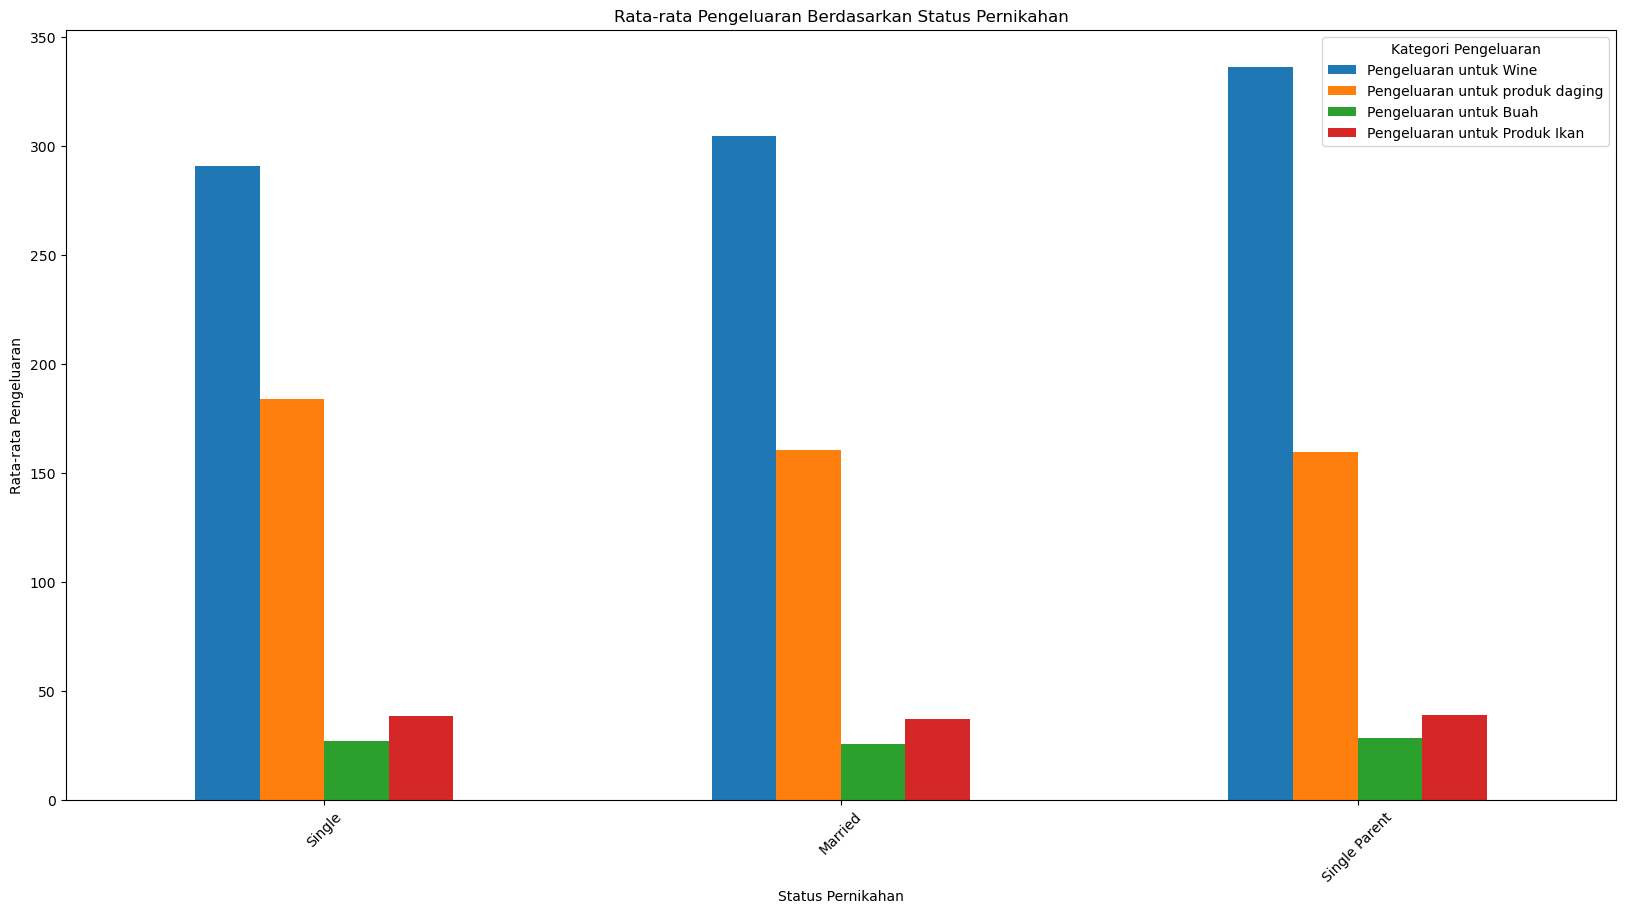

In [173]:
# Visualisasi Histogram

# Mengurutkan kategori
order = ['Single', 'Married', 'Single Parent']
SegmenStatusNikah = SegmenStatusNikah.reindex(order)

#Visualisasi
SegmenStatusNikah.plot(kind='bar', figsize=(20, 10))
plt.title('Rata-rata Pengeluaran Berdasarkan Status Pernikahan')
plt.ylabel('Rata-rata Pengeluaran')
plt.xlabel('Status Pernikahan')
plt.xticks(rotation=45)
plt.legend(title='Kategori Pengeluaran')
plt.show()

Karena dibutuhkan info tambahan, saya mencoba memasukkan variabel anak

In [174]:
df = df.dropna(subset=['Kidhome', 'Teenhome'])

In [175]:
SegmentAnak = df_cleaned.groupby(['Kidhome', 'Teenhome'])[[
    'Pengeluaran untuk Wine', 
    'Pengeluaran untuk produk daging',
    'Pengeluaran untuk Buah',
    'Pengeluaran untuk Produk Ikan']].mean()
print("\nRata-rata Pengeluaran Berdasarkan Jumlah Anak dan Remaja di Rumah:")
print(SegmentAnak)


Rata-rata Pengeluaran Berdasarkan Jumlah Anak dan Remaja di Rumah:
                  Pengeluaran untuk Wine  Pengeluaran untuk produk daging  \
Kidhome Teenhome                                                            
0       0                     491.515152                       368.074960   
        1                     418.670989                       137.236629   
        2                     409.566667                       133.466667   
1       0                      82.628283                        49.365657   
        1                     124.239130                        45.567935   
        2                     276.000000                       110.095238   
2       0                      61.235294                        42.058824   
        1                      78.310345                        23.068966   

                  Pengeluaran untuk Buah  Pengeluaran untuk Produk Ikan  
Kidhome Teenhome                                                         
0       0    

In [177]:
# Karena melihat data terlalu complex, saya menggabung anak dan remaja menjadi 1 variable
# anak dan remaja berapapun = only "kids" or "no kids"

df_cleaned['Kids_Status'] = df_cleaned.apply(lambda x: 'Kids' if x['Kidhome'] > 0 or x['Teenhome'] > 0 else 'No Kids', axis=1)

SegmenKidsStatus = df_cleaned.groupby('Kids_Status')[[
    'Pengeluaran untuk Wine', 
    'Pengeluaran untuk produk daging',
    'Pengeluaran untuk Buah',
    'Pengeluaran untuk Produk Ikan']].mean()
print("\nRata-rata Pengeluaran Berdasarkan Status Anak:")
print(SegmenKidsStatus)


Rata-rata Pengeluaran Berdasarkan Status Anak:
             Pengeluaran untuk Wine  Pengeluaran untuk produk daging  \
Kids_Status                                                            
Kids                     232.299302                        84.705136   
No Kids                  491.515152                       368.074960   

             Pengeluaran untuk Buah  Pengeluaran untuk Produk Ikan  
Kids_Status                                                         
Kids                      16.037413                      22.120482  
No Kids                   52.476874                      76.663477  


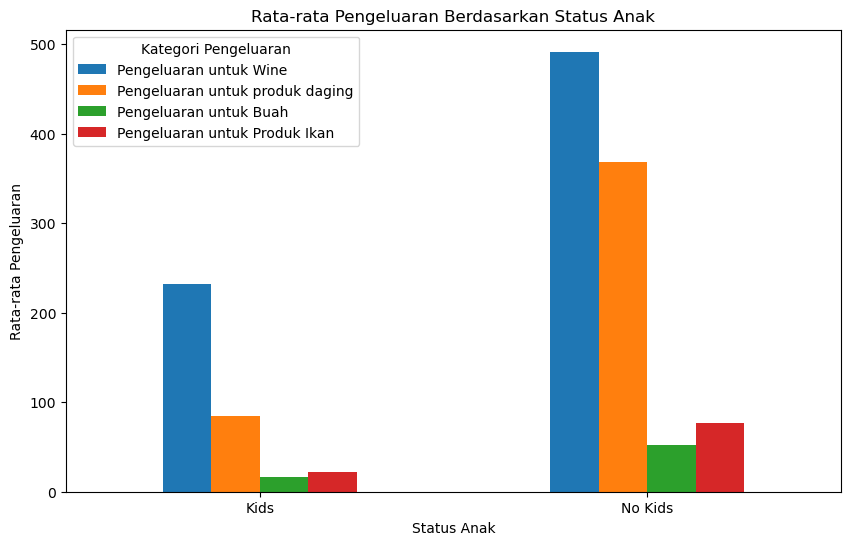

In [180]:
# 4. Visualisasi Rata-rata Pengeluaran Berdasarkan Status Anak
SegmenKidsStatus.plot(kind='bar', figsize=(10, 6))
plt.title('Rata-rata Pengeluaran Berdasarkan Status Anak')
plt.ylabel('Rata-rata Pengeluaran')
plt.xlabel('Status Anak')
plt.xticks(rotation=0)
plt.legend(title='Kategori Pengeluaran')
plt.show()


In [181]:
df_cleaned['Pengeluaran Total'] = df_cleaned[[
    'Pengeluaran untuk Wine',
    'Pengeluaran untuk produk daging',
    'Pengeluaran untuk Buah',
    'Pengeluaran untuk Produk Ikan']].sum(axis=1)

In [182]:
pivot_table = pd.pivot_table(
    df_cleaned,
    values='Pengeluaran Total',
    index=['Kids_Status', 'CleanedStatus'],
    columns='Golongan Pendapatan',
    aggfunc='mean')

print("\nTabel Pivot Pengeluaran Berdasarkan Status Anak, Status Pernikahan, dan Pendapatan:")
print(pivot_table)


Tabel Pivot Pengeluaran Berdasarkan Status Anak, Status Pernikahan, dan Pendapatan:
Golongan Pendapatan           Rendah      Sedang       Tinggi
Kids_Status CleanedStatus                                    
Kids        Married        53.161074  391.012403  1082.686275
            Single         52.638095  341.210811   992.333333
            Single Parent  41.488889  438.864516  1050.333333
No Kids     Married        85.200000  817.500000  1319.906542
            Single         86.035714  893.933333  1364.537634
            Single Parent  89.076923  794.954545  1232.437500


/var/folders/mw/z3kzz6w94jlg5x6x44_4d6qm0000gn/T/ipykernel_9011/1453088884.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(


<Axes: xlabel='Golongan Pendapatan', ylabel='Kids_Status-CleanedStatus'>

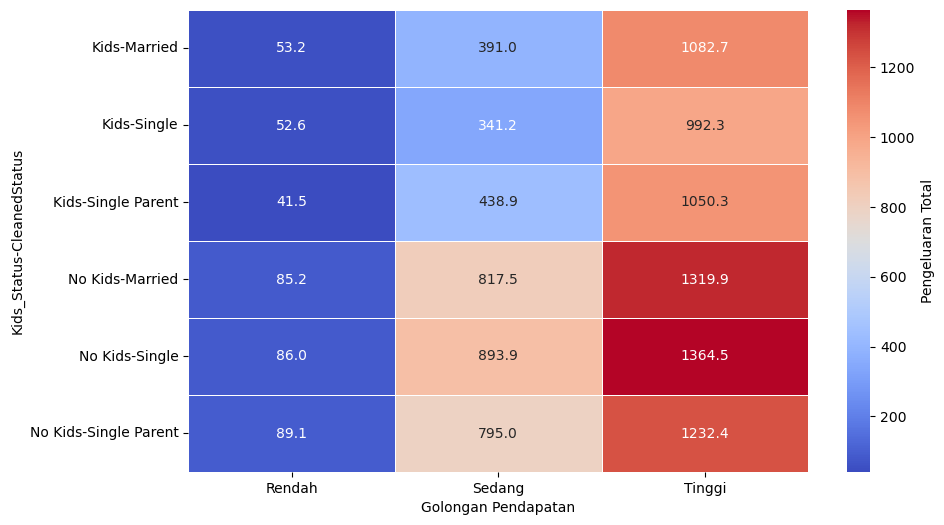

In [183]:
#Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_table, 
    annot=True,
    fmt='.1f',
    cmap='coolwarm',
    cbar_kws={'label': 'Pengeluaran Total'},
    linewidths=0.5
)

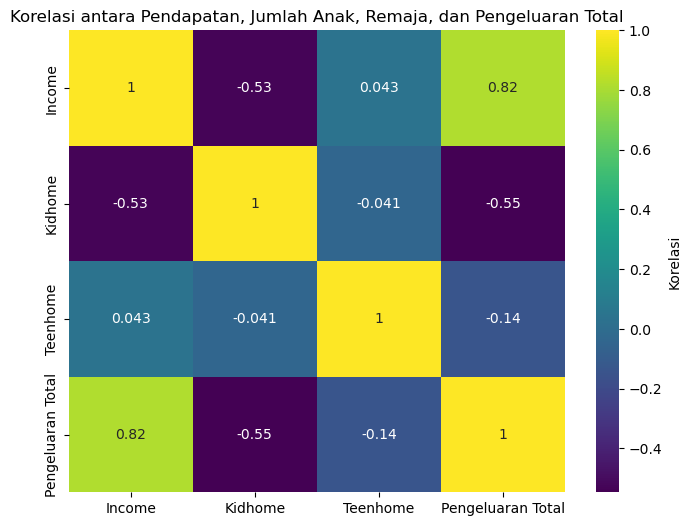

In [184]:
# Melihat Korelasi

correlationVar = df_cleaned[[
    'Income', 'Kidhome', 'Teenhome', 'Pengeluaran Total']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlationVar,
    annot=True,
    cmap='viridis',
    cbar_kws={'label': 'Korelasi'}
)
plt.title('Korelasi antara Pendapatan, Jumlah Anak, Remaja, dan Pengeluaran Total')
plt.show()


/var/folders/mw/z3kzz6w94jlg5x6x44_4d6qm0000gn/T/ipykernel_9011/464999534.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['CleanedStatus'] = subset_data['CleanedStatus'].astype('category').cat.codes


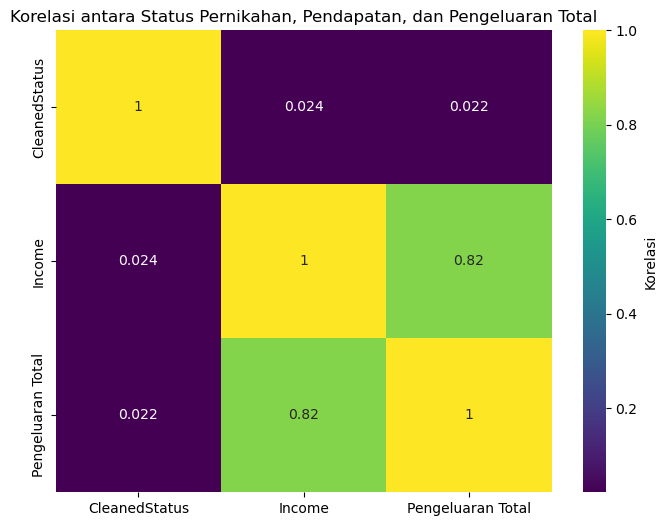

In [185]:
# Subset data hanya untuk kategori CleanedStatus, Income, dan Pengeluaran Total
subset_data = df_cleaned[['CleanedStatus', 'Income', 'Pengeluaran Total']]

# Encode CleanedStatus menjadi numerik untuk heatmap
subset_data['CleanedStatus'] = subset_data['CleanedStatus'].astype('category').cat.codes

# Membuat heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(
    subset_data.corr(),
    annot=True,
    cmap='viridis',
    cbar_kws={'label': 'Korelasi'}
)
plt.title('Korelasi antara Status Pernikahan, Pendapatan, dan Pengeluaran Total')
plt.show()
